<img src = 'https://ichi.pro/assets/images/max/724/1*-REN2wCkTiWKo66_kSPP2g.png'>

It's very simple and useful Skill!, It's make great score faster. I recommand this library.

**If you want study more this library. reference below Link!**

Staking Model  AC - 96.9%<br>
Blending Model  AC- 93.3%<br>
Ensemble Model  AC- 95.6%

**It's not use GridSearchCV, just Default Model. I think if you using GridSearchCV, and Tune Hyper Parameter. You get great Best Score.** 

**If you useful or helpful, Upvote! Thanks for reading**

## Contents

- Load Dataset
- import Pycaret
- Setting Enviroment in Pycaret
- Compare All Models
- Create Model
- Model Data Visualization
- Model
- predict test Data
- submission

# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')

row_id = test_df['row_id']
train_df = train_df.drop('row_id', axis = 1)
test_df = test_df.drop('row_id', axis = 1)

train_df.head()

# Import Pycaret

In [ ]:
!pip install pycaret

### It is still in the early stage, sometimes there's an error, but it's well Work. Don't Worry

In [ ]:
from pycaret.classification import *

mult_classification = setup(data = train_df, target = 'target', session_id = 123, fold_shuffle= True, train_size = 0.8, use_gpu= True, silent = True)

# Compare All Models
<hr>

it work default 10 times KFOLD and if you want to change fold parameter,you can use parameter  ex (fold = 5)

The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the sort parameter.

**but It's so slow. if you want to see run code.**
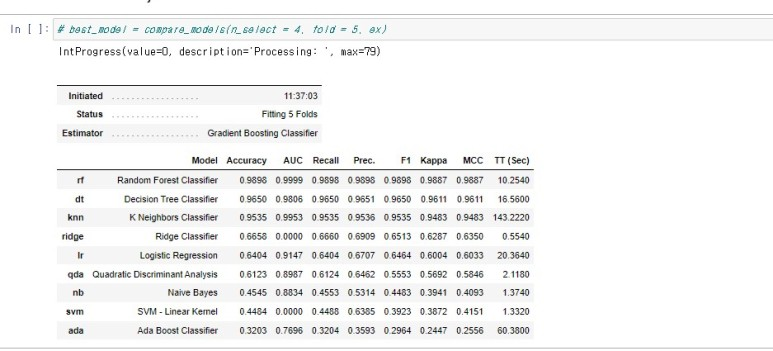

In [ ]:
# best_model = compare_models(n_select = 4, fold = 5)

You can see available model

In [ ]:
models()

# Create Variety Model

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. 

As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter.

This selector mean top performing or idea for this type of data. (just, illustration)


Staking Model  AC - 96.9%<br>
Blending Model  AC- 93.3%<br>
Ensemble Model  AC- 95.6%

In [ ]:
Ext_Classifier = create_model('et')

In [ ]:
Rf_Classifier = create_model('rf')

In [ ]:
dt_Classifier = create_model('dt')

In [ ]:
knn_Classifier = create_model('knn')

# Data & Model Visualization

In [ ]:
plot_model(Ext_Classifier, plot = 'confusion_matrix')

In [ ]:
plot_model(Ext_Classifier, plot = 'class_report')

In [ ]:
plot_model(Ext_Classifier, plot='boundary')

In [ ]:
plot_model(Ext_Classifier, plot = 'error')

# Blending Model
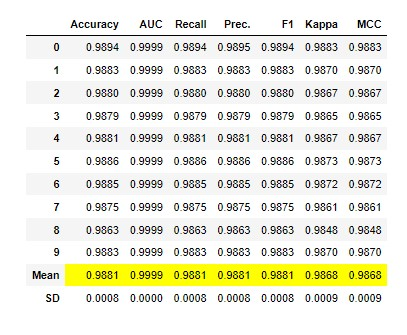

In [ ]:
# blender = blend_models(estimator_list = [Ext_Classifier, Rf_Classifier, dt_Classifier, knn_Classifier])

# Stacking Model
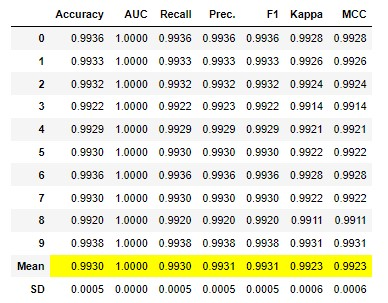

In [ ]:
# stacking = stack_models(estimator_list = [Ext_Classifier, Rf_Classifier, dt_Classifier, knn_Classifier])

# Ensemble Model
- Method for ensembling base estimator. It can be ‘Bagging’ or ‘Boosting'

In [ ]:
ensemble = ensemble_model(Ext_Classifier, method = 'Boosting')

# Submit & Conclusion

In [ ]:
# blen_label = predict_model(blender, data = test_df)
# stack_label = predict_model(stacking, data = test_df)
ensemble_label = predict_model(ensemble, data = test_df)

In [ ]:
# choose option!
# submit = pd.DataFrame({
#     'row_id' : row_id,
#     'target' : blen_label['Label']
# })

# submit.to_csv('submission(blend).csv', index = False)

# submit = pd.DataFrame({
#     'row_id' : row_id,
#     'target' : stack_label['Label']
# })

# submit.to_csv('submission(stack).csv', index = False)

submit = pd.DataFrame({
    'row_id' : row_id,
    'target' : ensemble_label['Label']
})

submit.to_csv('submission(Ensemble).csv', index = False)

# Upvote! It's Free.

# reference Link

Pycaret : https://pycaret.readthedocs.io/en/latest/index.html